##Descriptive Analysis - NVSS Infant Mortality

The original NVSS Linked Birth–Infant Death dataset contains almost 4 million records and 247 variables, many of which are administrative, have extremely high amount missing values, or directly encode the circumstances of infant deaths (e.g., age at death, cause-of-death ICD codes). Including these variables would create label leakage, where a model can “cheat” by learning information directly tied to mortality outcomes rather than learning true predictive patterns.

Before starting the modeling process, our group created a cleaned and standardized dataset, which is the file we refer to as nvss_aggregated.csv.

- Selected around 40 medically relevant features used in infant mortality research (maternal risk factors, prenatal care, birth characteristics, congenital anomalies, etc.).

- Removed death-related variables (e.g., cause-of-death codes, autopsy information) to avoid label leakage.

- Dropped columns with more than 80% missing values to ensure model reliability.

- Dropped all rows containing missing values instead of imputing, since imputation could distort rare-event outcomes.

- Encoded categorical variables (originally “N”, “Y”, “U”, or “M/F”) into numeric codes to make them machine-learning compatible.

- Created a clean binary target variable infant_death based on the NVSS matchs field (1 = infant death <1 year, 2 = alive).

- Exported the cleaned dataset as nvss_aggregated.csv, and then used it to generate stratified train/validation/test splits.





We used this same dataset (aggregated.csv) for our descriptive analysis. This is because it will allow us to relfect the same features and formatting used in training, test data remians untouched and unbiased, all variables are clean and consistent, and avoid issues related to large size daatset.

#### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset


In [ ]:
import pandas as pd
df = pd.read_csv("/nvss_aggregated.csv")
df.head()


,matchs,mager14,mar,meduc,mbrace,umhisp,lbo,tbo,precare_rec,previs_rec,...,ca_menin,ca_heart,ca_ompha,ca_gastro,ca_limb,ca_cleftlp,ca_cleft,ca_downs,ca_chrom,infant_death
0,2,8,1,3.0,1.0,1,2,9,1.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,2,9,1,4.0,21.0,0,4,5,1.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2,9,1,6.0,1.0,0,1,1,1.0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2,10,1,6.0,1.0,0,3,5,2.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2,8,2,2.0,3.0,0,1,1,1.0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# General info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496034 entries, 0 to 496033
Data columns (total 40 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   matchs        496034 non-null  int64  
 1   mager14       496034 non-null  int64  
 2   mar           496034 non-null  int64  
 3   meduc         496034 non-null  float64
 4   mbrace        496034 non-null  float64
 5   umhisp        496034 non-null  int64  
 6   lbo           496034 non-null  int64  
 7   tbo           496034 non-null  int64  
 8   precare_rec   496034 non-null  float64
 9   previs_rec    496034 non-null  int64  
 10  wtgain_rec    496034 non-null  int64  
 11  urf_diab      496034 non-null  int64  
 12  urf_chyper    496034 non-null  int64  
 13  urf_phyper    496034 non-null  int64  
 14  urf_eclam     496034 non-null  int64  
 15  rf_ppterm     496034 non-null  int64  
 16  rf_ppoutc     496034 non-null  int64  
 17  rf_cesar      496034 non-null  int64  
 18  rf_n

In [ ]:
df.describe()

,matchs,mager14,mar,meduc,mbrace,umhisp,lbo,tbo,precare_rec,previs_rec,...,ca_menin,ca_heart,ca_ompha,ca_gastro,ca_limb,ca_cleftlp,ca_cleft,ca_downs,ca_chrom,infant_death
count,496034.000000,496034.000000,496034.000000,496034.000000,496034.000000,496034.000000,496034.000000,496034.000000,496034.000000,496034.000000,...,496033.000000,496033.000000,496033.000000,496033.000000,496033.000000,496033.000000,496033.000000,496033.000000,496033.000000,496033.000000
mean,1.995446,9.330262,1.395017,4.286371,2.602261,1.032510,2.112968,2.377327,1.291571,7.164739,...,0.000302,0.000444,0.000302,0.000597,0.000282,0.000968,0.000371,1.000395,1.000427,0.004554
std,0.067330,1.435025,0.488855,1.987883,4.219239,1.760181,1.272617,1.497942,0.733121,1.866264,...,0.020671,0.026635,0.020671,0.031870,0.019672,0.041917,0.023756,0.032808,0.029915,0.067331
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,2.000000,9.000000,1.000000,4.000000,1.000000,0.000000,2.000000,2.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,10.000000,2.000000,6.000000,1.000000,1.000000,3.000000,3.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2.000000,14.000000,2.000000,9.000000,24.000000,9.000000,9.000000,9.000000,5.000000,12.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000


#### Missing Values Check

In [ ]:
df.isnull().mean().sort_values(ascending=False)

,0
ca_chrom,0.000002
infant_death,0.000002
ca_downs,0.000002
ca_cleft,0.000002
ca_cleftlp,0.000002
ca_limb,0.000002
ca_gastro,0.000002
ca_ompha,0.000002
ca_heart,0.000002
ca_menin,0.000002


#### Variable Types

Because categorical variables were encoded numerically for modeling, the default data types are misleading. Instead, we rely on NVSS documentation to classify variables into meaningful groups.

In [ ]:
# Separate by expected variable type based on NVSS documentation

continuous_numerical = ["dbwt", "combgest"]

ordinal_numerical = [
    "mager14", "meduc", "mbrace",
    "precare_rec", "previs_rec", "wtgain_rec",
    "bwtr14", "gestrec10", "apgar5r",
    "lbo", "tbo", "rf_ncesar"
]

binary_categorical = [
    "urf_diab", "urf_chyper", "urf_phyper", "urf_eclam",
    "rf_ppterm", "rf_ppoutc", "rf_cesar",
    "ab_vent", "ab_vent6", "ab_nicu",
    "ca_anen", "ca_menin", "ca_heart", "ca_ompha",
    "ca_gastro", "ca_limb", "ca_cleftlp", "ca_cleft",
    "ca_downs", "ca_chrom"
]

nominal_categorical = ["mar", "umhisp", "sex", "dplural"]

print("Continuous numeric:", len(continuous_numerical))
print("Ordinal numeric:", len(ordinal_numerical))
print("Binary categorical:", len(binary_categorical))
print("Nominal categorical:", len(nominal_categorical))


Continuous numeric: 2
Ordinal numeric: 12
Binary categorical: 20
Nominal categorical: 4


In [ ]:
# Rename Columns for Readablity
df_vis = df.copy()

rename_map = {
    "dbwt": "Birthweight (g)",
    "combgest": "Gestational Age (weeks)",
    "apgar5r": "Apgar Score (5 min)",
    "bwtr14": "Birthweight Category",
    "gestrec10": "Gestational Age Category",
    "mar": "Marital Status",
    "mager14": "Maternal Age Group",
    "meduc": "Maternal Education",
    "mbrace": "Maternal Race",
    "umhisp": "Hispanic Origin",
    "lbo": "Live Birth Order",
    "tbo": "Total Birth Order",
    "precare_rec": "Prenatal Care Start (Month)",
    "previs_rec": "Prenatal Visits",
    "wtgain_rec": "Weight Gain Category",
    "tobuse": "Tobacco Use",
    "cig_rec6": "Cigarette Use Intensity",
    "sex": "Infant Sex",
    "dplural": "Plurality",
    "infant_death": "Infant Death (<1 year)",

    # Medical + congenital
    "ab_nicu": "NICU Admission",
    "ab_vent": "Ventilation",
    "ab_vent6": "Ventilation >6hrs",
    "urf_diab": "Maternal Diabetes",
    "urf_chyper": "Chronic Hypertension",
    "urf_phyper": "Pregnancy Hypertension",
    "urf_eclam": "Eclampsia",
    "rf_ppterm": "Previous Preterm Birth",
    "rf_ppoutc": "Previous Poor Outcome",
    "rf_cesar": "Previous Cesarean",
    "rf_ncesar": "Number of Previous Cesareans",

    # congenital anomalies
    "ca_anen": "Anencephaly",
    "ca_menin": "Spina Bifida",
    "ca_heart": "Congenital Heart Disease",
    "ca_ompha": "Omphalocele",
    "ca_gastro": "Gastroschisis",
    "ca_limb": "Limb Reduction",
    "ca_cleftlp": "Cleft Lip/Palate",
    "ca_cleft": "Cleft Palate",
    "ca_downs": "Down Syndrome",
    "ca_chrom": "Chromosomal Disorder"
}

df_vis.rename(columns=rename_map, inplace=True)


#### Outcome distribtuion

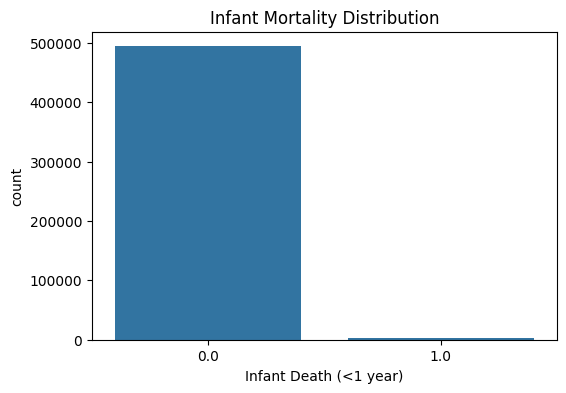

,proportion
Infant Death (<1 year),
0.0,0.995446
1.0,0.004554


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Infant Death (<1 year)", data=df_vis)
plt.title("Infant Mortality Distribution")
plt.show()

df_vis["Infant Death (<1 year)"].value_counts(normalize=True)


The dataset is extremely imbalanced, with infant deaths representing <0.5% of records.

This imbalance affects both our Descriptive Analysis and modeling (models may overpredict the majority class).

#### Different Variables Distribution

We grouped variables into categories (birth characteristics, maternal demographics, prenatal care, medical risk factors, congenital anomalies, and interventions) based on how the NVSS documentation defines them. This creates a more organized EDA and mirrors how public-health literature analyzes infant mortality.
- Birth Characteristics — things about the newborn (birthweight, gestational age, Apgar score)

- Maternal Demographics — characteristics of the mother (age, education, race)

- Prenatal Care & Pregnancy Factors — timing of care, weight gain, parity

- Medical Risk Factors — maternal conditions such as diabetes or hypertension

- Congenital Anomalies — birth defects

- Interventions — NICU admission, ventilation, etc

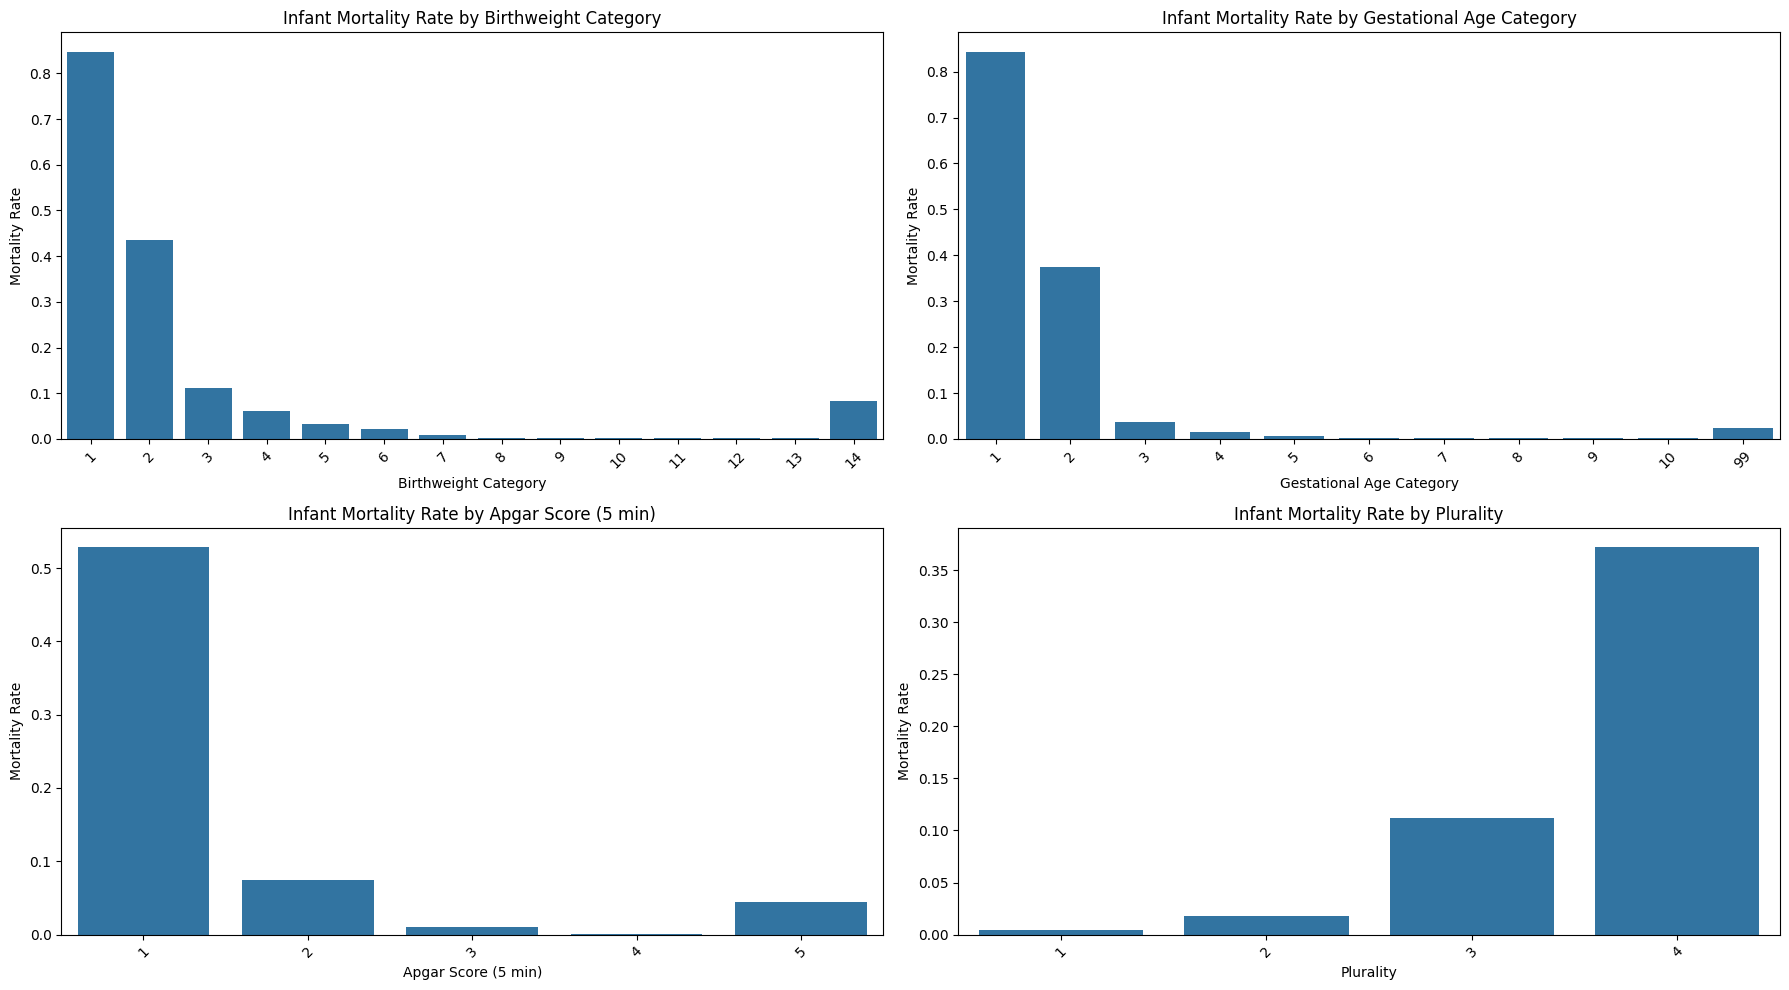

In [ ]:
birth_vars = [
    "Birthweight Category",
    "Gestational Age Category",
    "Apgar Score (5 min)",
    "Plurality"
]

plt.figure(figsize=(18, 10))
for i, col in enumerate(birth_vars, 1):
    rate = df_vis.groupby(col)["Infant Death (<1 year)"].mean().reset_index()
    plt.subplot(2, 2, i)
    sns.barplot(data=rate, x=col, y="Infant Death (<1 year)")
    plt.title(f"Infant Mortality Rate by {col}")
    plt.ylabel("Mortality Rate")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





Birthweight seems to be a strong predictor of infant mortality. Extremely low and very low birthweight infants have dramatically higher mortality risk compared to normal-weight infants.

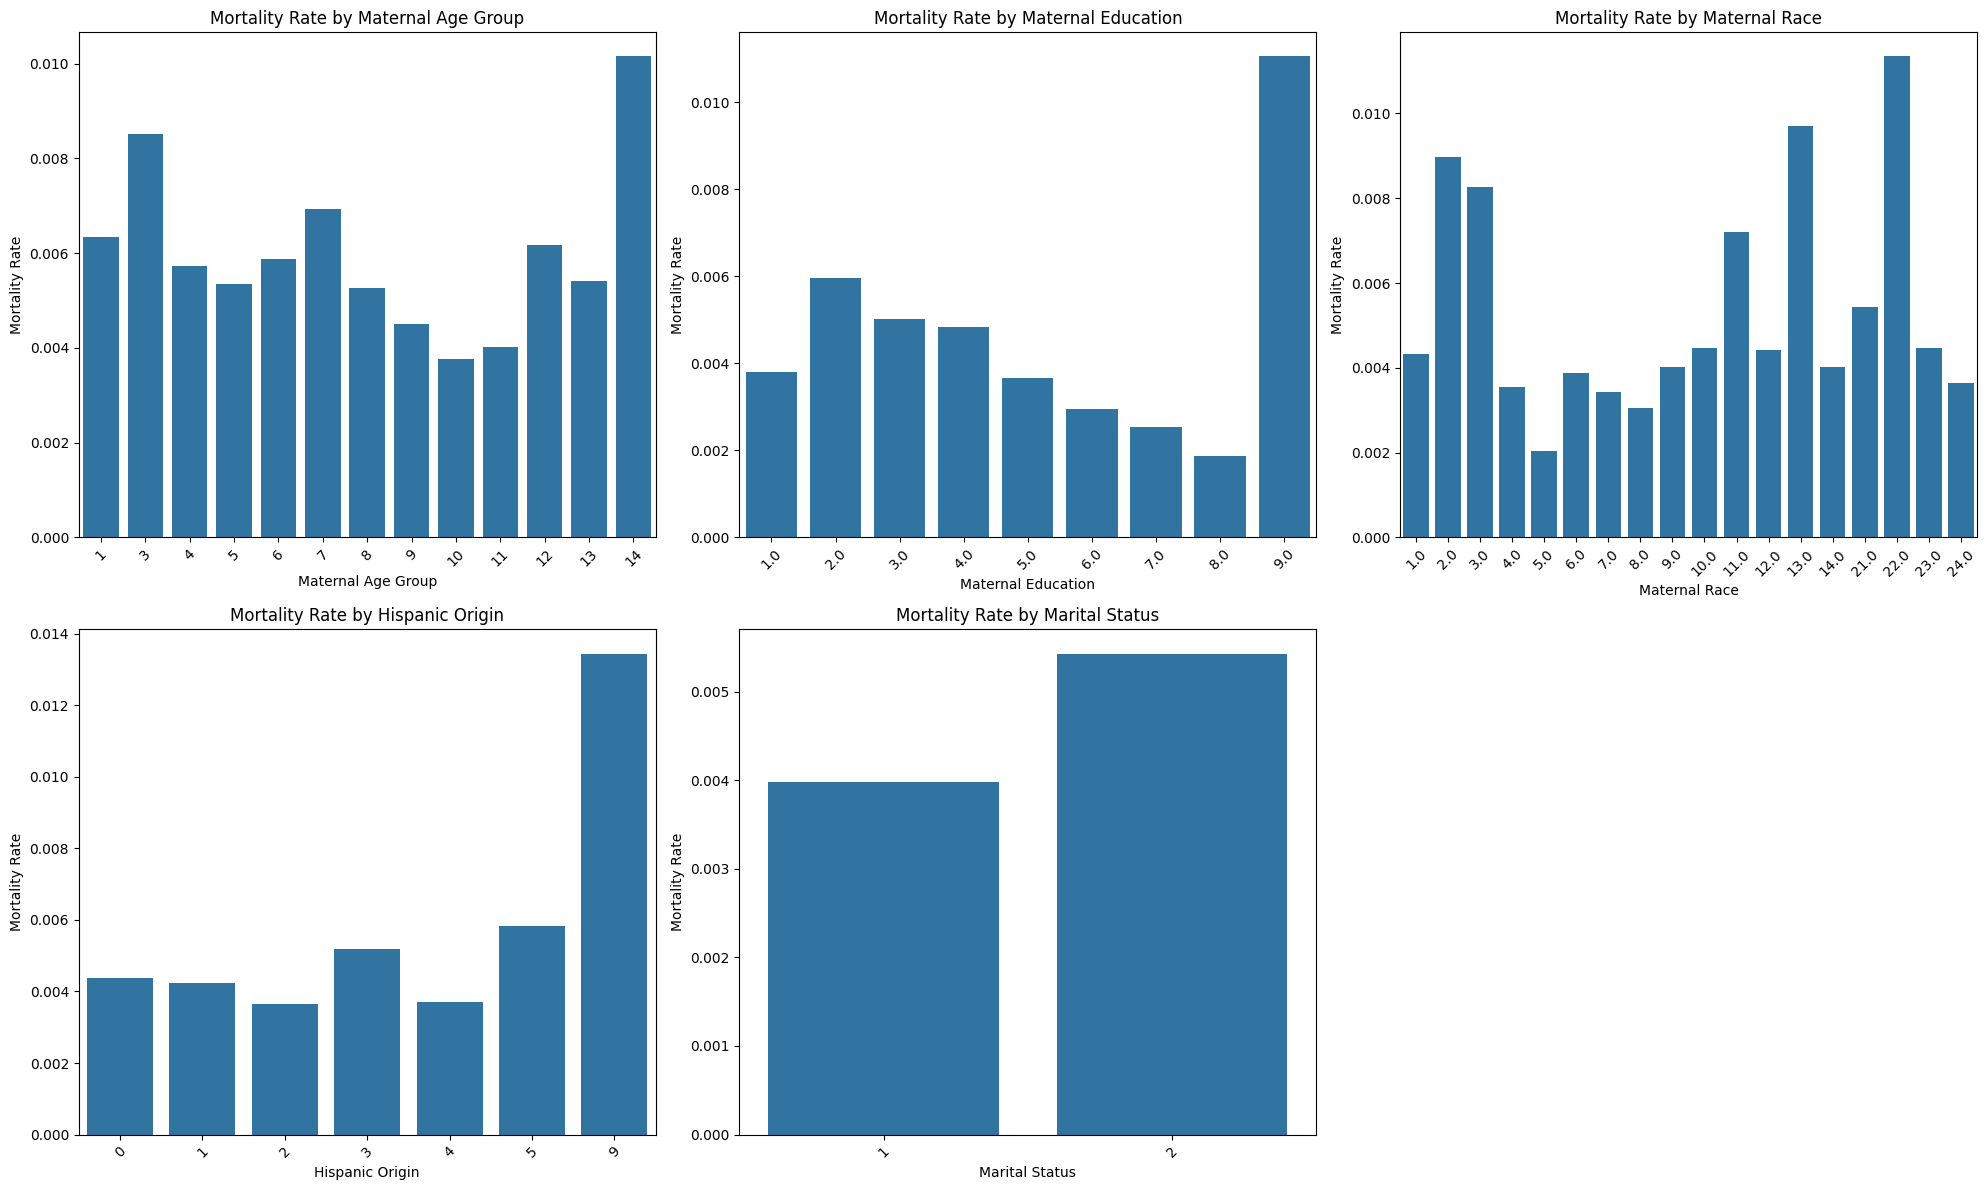

In [ ]:
demo_vars = [
    "Maternal Age Group",
    "Maternal Education",
    "Maternal Race",
    "Hispanic Origin",
    "Marital Status"
]

plt.figure(figsize=(20, 12))
for i, col in enumerate(demo_vars, 1):
    rate = df_vis.groupby(col)["Infant Death (<1 year)"].mean().reset_index()
    plt.subplot(2, 3, i)
    sns.barplot(data=rate, x=col, y="Infant Death (<1 year)")
    plt.title(f"Mortality Rate by {col}")
    plt.ylabel("Mortality Rate")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Maternal demographic factors show meaningful differences in infant mortality risk. Younger and older mothers experience higher mortality compared to those in mid reproductive ages. Higher maternal education is associated with reduced mortality, reflecting social and healthcare advantages. Substantial racial disparities appear, consistent with national public-health data. Additionally, infants born to unmarried mothers show higher mortality, likely due to underlying socioeconomic differences. These demographic factors provide important contextual risk information, even though they are less predictive than birth characteristics like birthweight or gestational age.

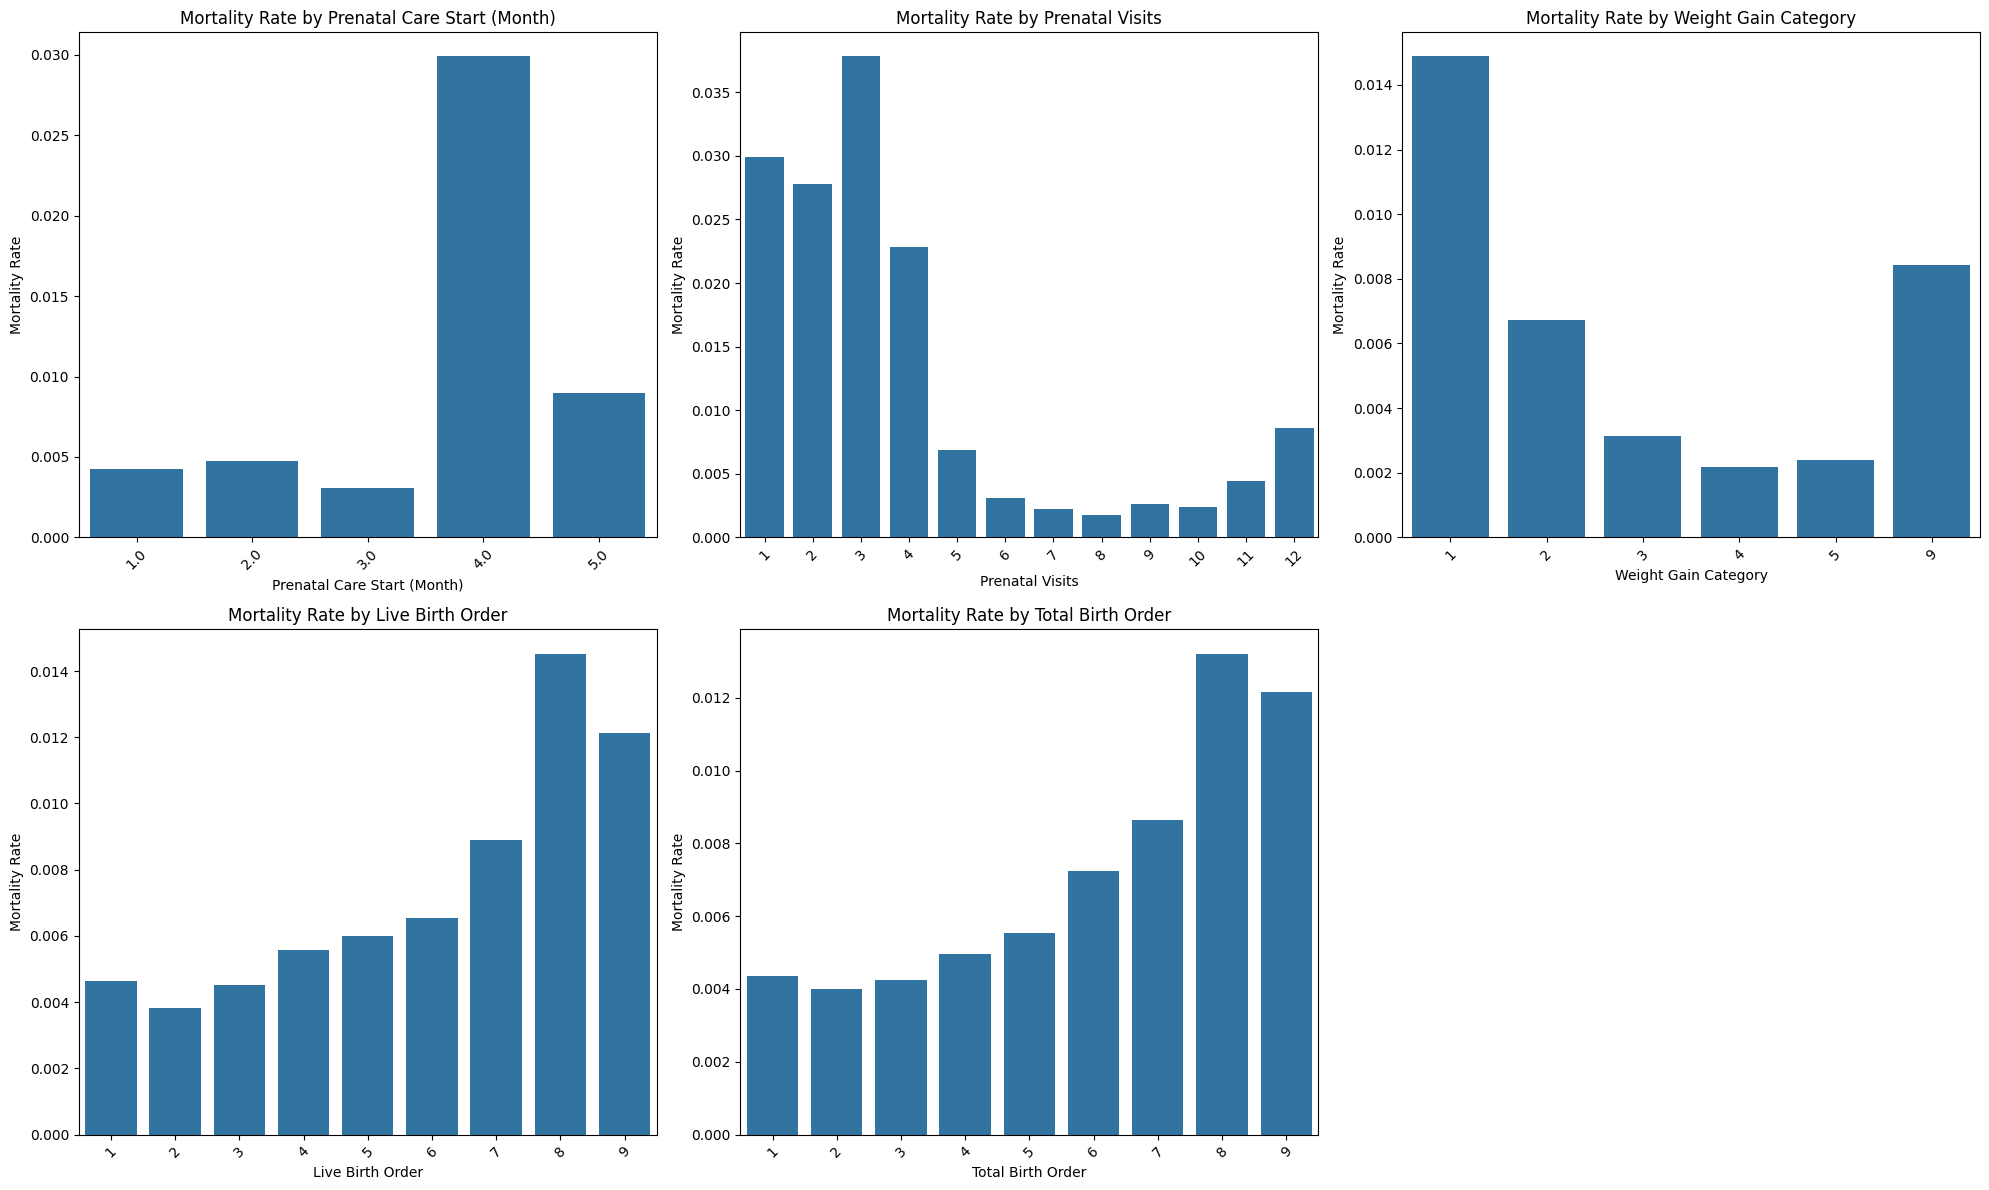

In [ ]:
prenatal_vars = [
    "Prenatal Care Start (Month)",
    "Prenatal Visits",
    "Weight Gain Category",
    "Live Birth Order",
    "Total Birth Order"
]

plt.figure(figsize=(20, 12))
for i, col in enumerate(prenatal_vars, 1):
    rate = df_vis.groupby(col)["Infant Death (<1 year)"].mean().reset_index()
    plt.subplot(2, 3, i)
    sns.barplot(data=rate, x=col, y="Infant Death (<1 year)")
    plt.title(f"Mortality Rate by {col}")
    plt.ylabel("Mortality Rate")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Across prenatal and pregnancy-related variables, we observed strong and consistent risk patterns. Late initiation of prenatal care and a low number of prenatal visits were both associated with substantially higher infant mortality, highlighting the importance of early and continuous care. Weight gain showed a U-shaped relationship, where both inadequate and excessive maternal weight gain increased mortality risk. Finally, higher birth order was associated with rising mortality, suggesting that larger family size or maternal physiological factors may contribute to higher-risk births.

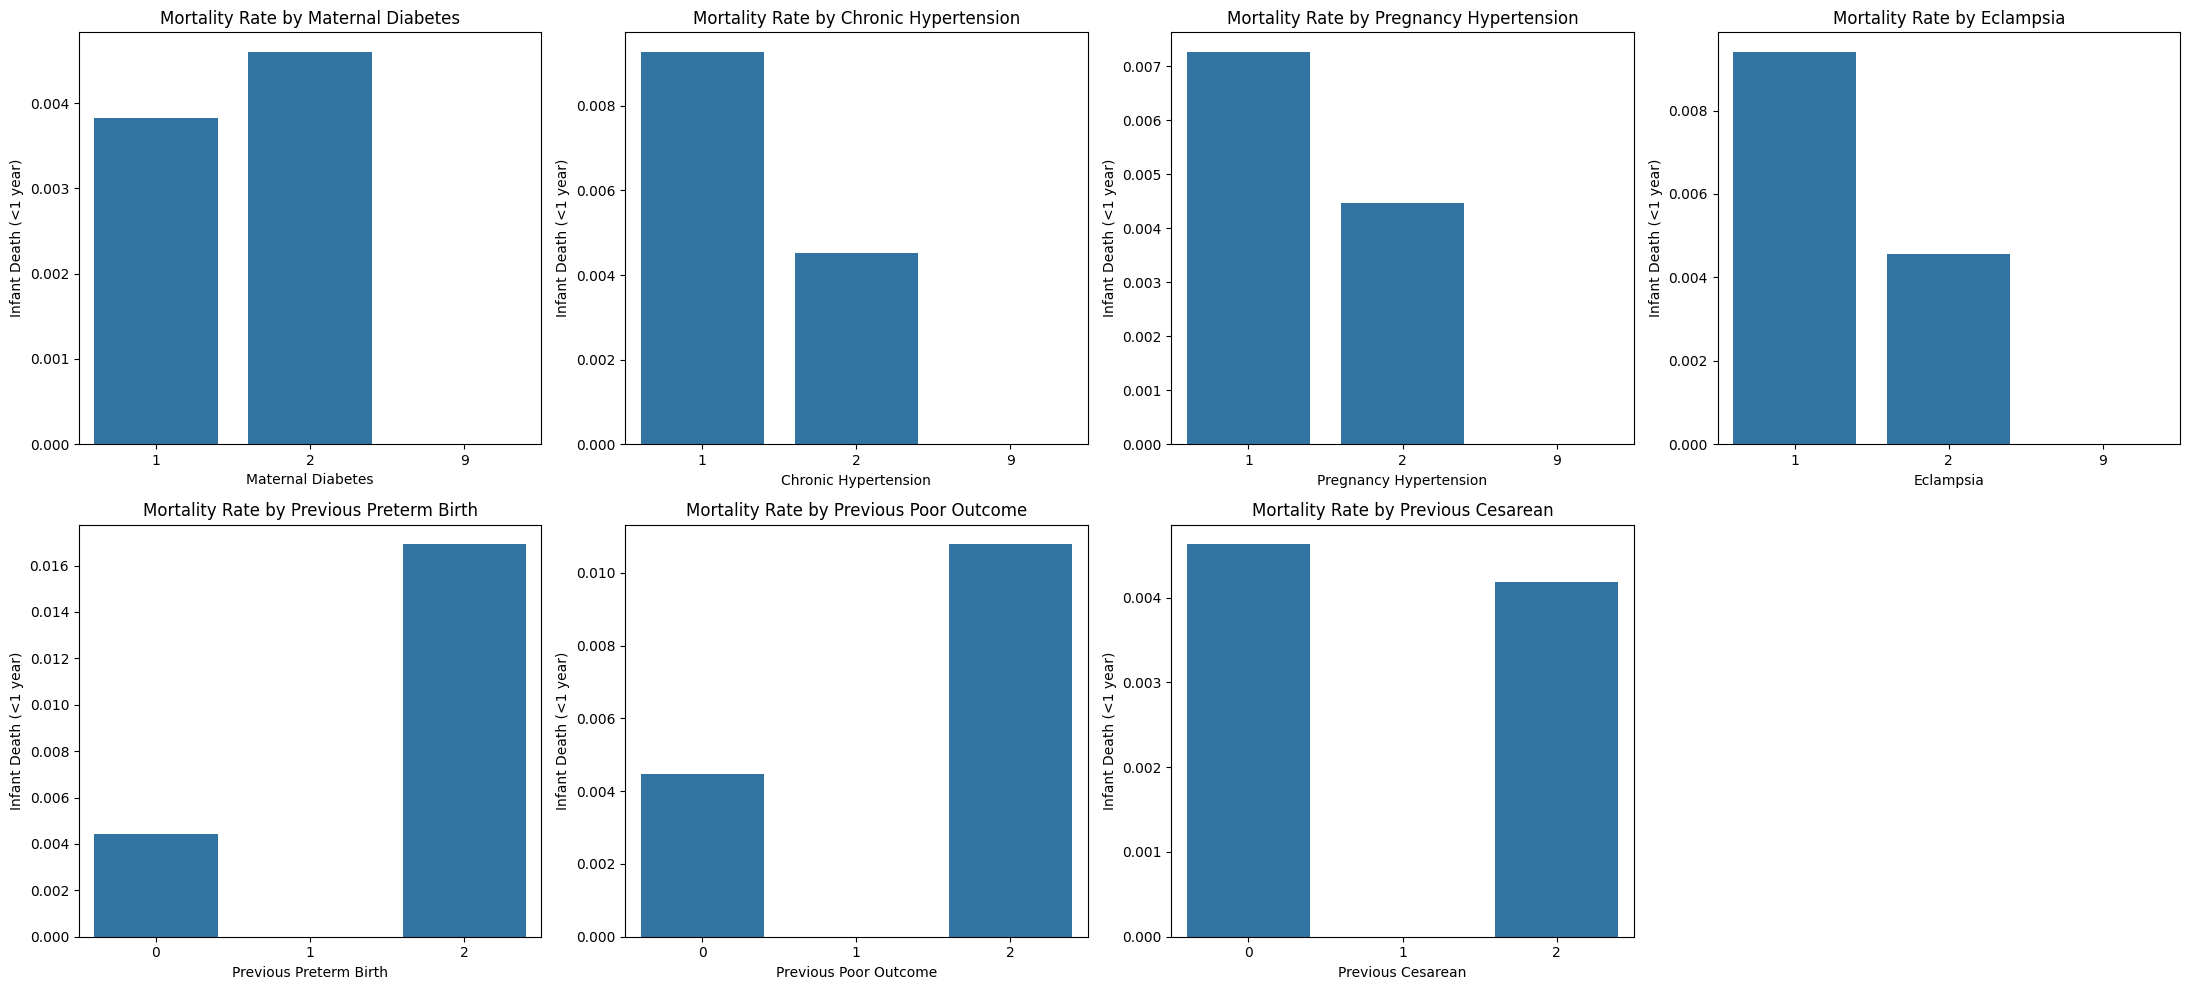

In [ ]:
risk_vars = [
    "Maternal Diabetes", "Chronic Hypertension", "Pregnancy Hypertension",
    "Eclampsia", "Previous Preterm Birth", "Previous Poor Outcome",
    "Previous Cesarean"
]

plt.figure(figsize=(22, 10))
for i, col in enumerate(risk_vars, 1):
    rate = df_vis.groupby(col)["Infant Death (<1 year)"].mean().reset_index()
    plt.subplot(2, 4, i)
    sns.barplot(data=rate, x=col, y="Infant Death (<1 year)")
    plt.title(f"Mortality Rate by {col}")
plt.tight_layout()
plt.show()



Medical risk factors showed some of the strongest relationships with infant mortality in the dataset. Chronic hypertension had one of the highest mortality rates, followed by eclampsia and pregnancy-induced hypertension. Maternal diabetes also elevated risk compared to non-diabetic pregnancies. Historical risk factors—including previous preterm birth and prior poor pregnancy outcomes—showed particularly large mortality increases, making them important predictors of infant health. Overall, maternal medical conditions, especially those involving cardiovascular complications, played a major role in infant mortality risk.


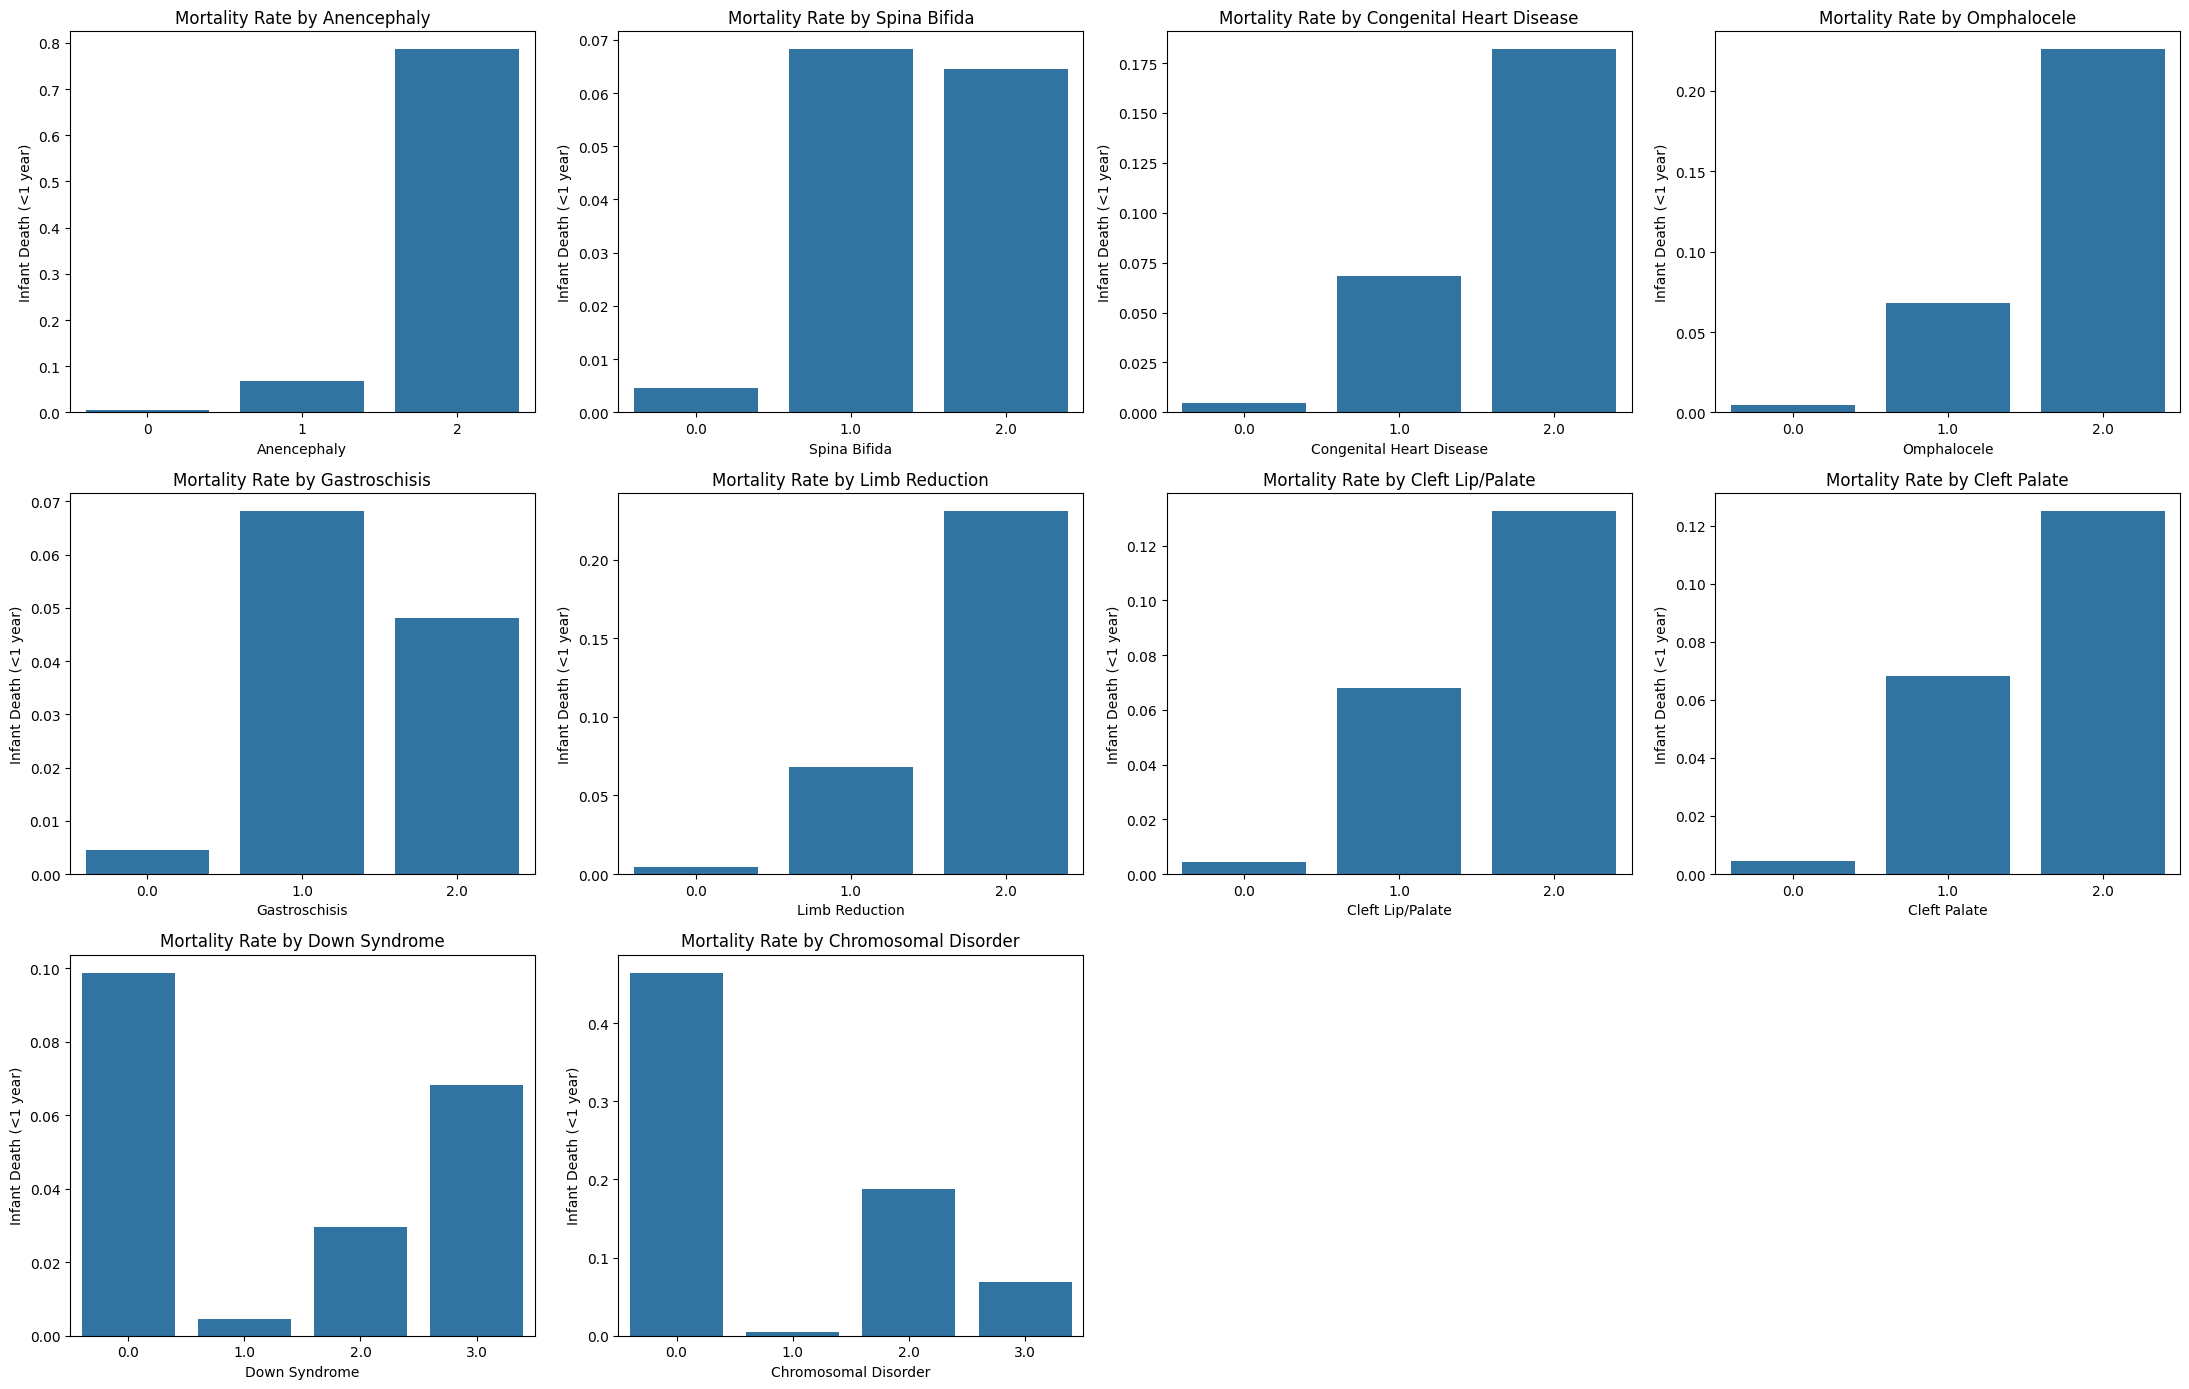

In [ ]:
anomaly_vars = [
    "Anencephaly", "Spina Bifida", "Congenital Heart Disease",
    "Omphalocele", "Gastroschisis", "Limb Reduction",
    "Cleft Lip/Palate", "Cleft Palate", "Down Syndrome",
    "Chromosomal Disorder"
]

plt.figure(figsize=(22, 14))
for i, col in enumerate(anomaly_vars, 1):
    rate = df_vis.groupby(col)["Infant Death (<1 year)"].mean().reset_index()
    plt.subplot(3, 4, i)
    sns.barplot(data=rate, x=col, y="Infant Death (<1 year)")
    plt.title(f"Mortality Rate by {col}")
plt.tight_layout()
plt.show()




Across all variables examined, congenital anomalies—especially anencephaly, congenital heart disease, omphalocele, limb reduction, and chromosomal disorders—show the strongest and most dramatic increases in infant mortality, far exceeding the effects observed for maternal, prenatal, or birth-related factors.

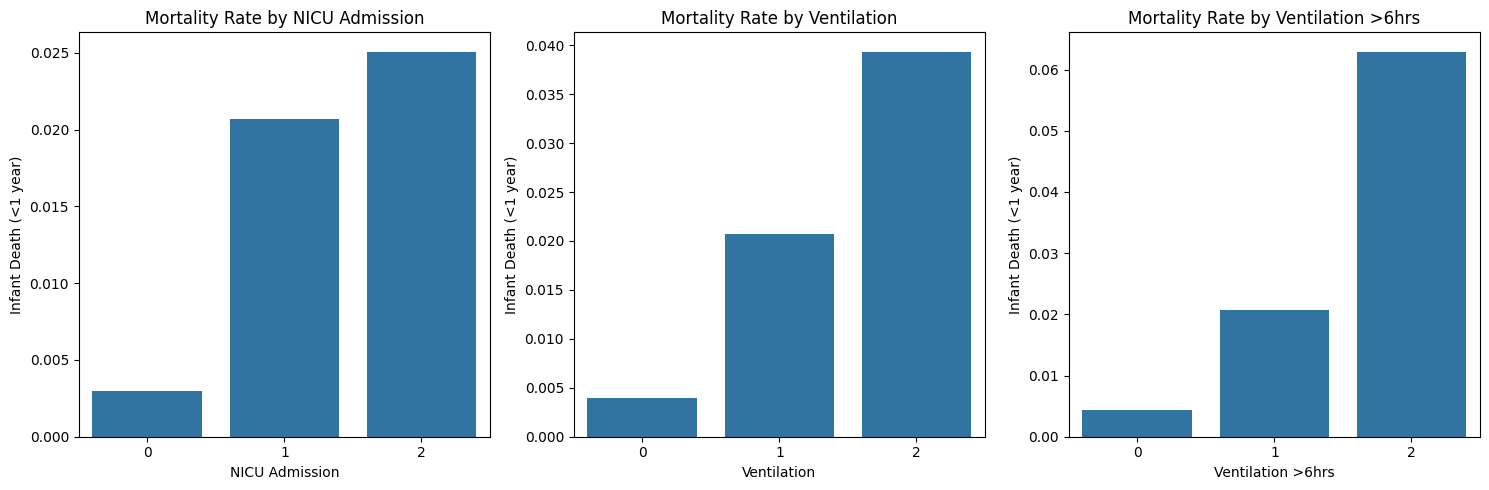

In [ ]:
intervention_vars = ["NICU Admission", "Ventilation", "Ventilation >6hrs"]

plt.figure(figsize=(15, 5))
for i, col in enumerate(intervention_vars, 1):
    rate = df_vis.groupby(col)["Infant Death (<1 year)"].mean().reset_index()
    plt.subplot(1, 3, i)
    sns.barplot(data=rate, x=col, y="Infant Death (<1 year)")
    plt.title(f"Mortality Rate by {col}")
plt.tight_layout()
plt.show()





Across all intervention-related variables—including NICU admission, assisted ventilation, and prolonged ventilation—infant mortality rates rise sharply, indicating that these interventions serve as strong markers of severe neonatal distress rather than direct causes of mortality.

#### Correlation Analysis

In [ ]:
corr = df_vis.corr(numeric_only=True)
corr.shape


(40, 40)

In [ ]:
target_corr = corr["Infant Death (<1 year)"].sort_values(ascending=False)
target_corr


,Infant Death (<1 year)
Infant Death (<1 year),1.000000
NICU Admission,0.083735
Anencephaly,0.073587
Ventilation,0.065633
Ventilation >6hrs,0.055824
Plurality,0.054918
Cleft Lip/Palate,0.039869
Congenital Heart Disease,0.032598
Omphalocele,0.027980
Limb Reduction,0.026426


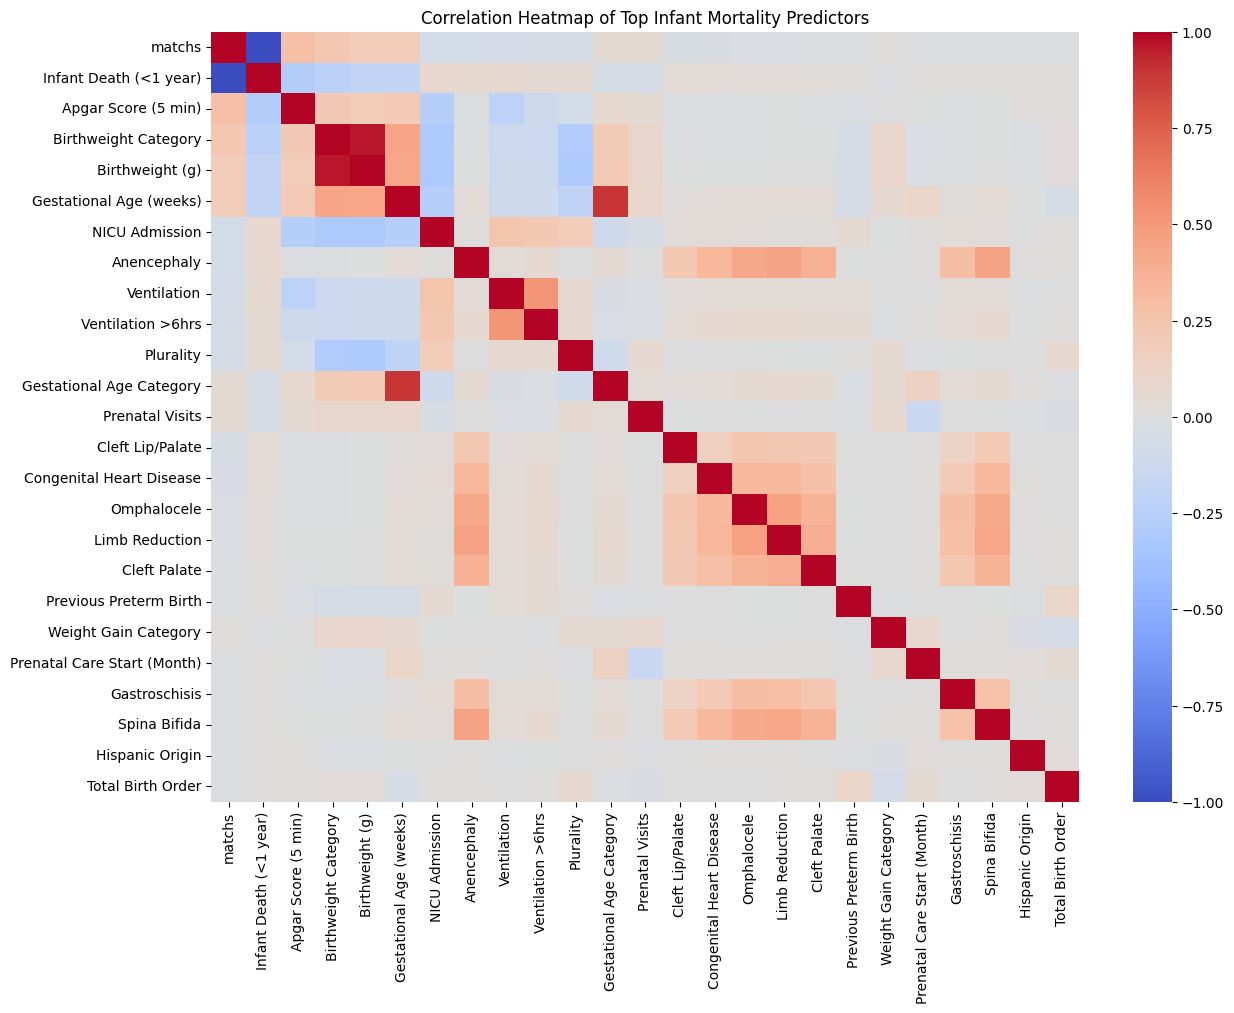

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df_vis.corr()

# Focus heatmap only on variables correlated with infant death
top_corr_vars = corr["Infant Death (<1 year)"].abs().sort_values(ascending=False).head(25).index
corr_subset = corr.loc[top_corr_vars, top_corr_vars]

plt.figure(figsize=(14, 10))
sns.heatmap(corr_subset, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Top Infant Mortality Predictors")
plt.show()


The heatmap shows that healthier birth conditions cluster together and are linked with lower infant mortality, while serious medical complications cluster together and align with higher mortality. Even though the correlations are small, the overall pattern supports the same findings from our earlier plots. Babies born stronger such as normal birthweight, normal gestational age, and good Apgar scores have much lower risk, while babies facing serious medical complications or congenital conditions are much more likely to die before age one.